<a href="https://colab.research.google.com/github/Ghaidahazaa/disease_trend_analysis.py/blob/main/Disease_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Excel file
# This script reads the provided Excel file containing disease case data across multiple years

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/MyDrive/OO 5.xlsx'

df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame
df.head()

,Sum of Cases,Column Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Disease,2020,2021,2022,Grand Total
1,Amoebic dysentery,1594,1685,964,4243
2,Bacillary dysentery (Shigellosis),36,55,25,116
3,Brucellosis,2372,2400,2543,7315
4,Chickenpox,1633,969,1457,4059


# Step 2: Load and clean Sheet5
# This dataset contains yearly disease cases from 2020 to 2022.

In [9]:

# Use pd.read_excel to read the specific sheet
df = pd.read_excel(file_path, sheet_name="Sheet5")

# The rest of your code should work as intended
df.columns = ["Disease", "2020", "2021", "2022", "Grand Total"]  # Rename columns
df = df.iloc[1:].reset_index(drop=True)  # Remove extra header row
# Ensure "Grand Total" is excluded from the rows that will be melted
df = df[df["Disease"] != "Grand Total"]
df = df.melt(id_vars=["Disease"], var_name="Year", value_name="Cases")  # Reshape data
# Filter out 'Grand Total' from the 'Year' column before conversion
df = df[df['Year'] != 'Grand Total']  # This line is added to filter out 'Grand Total'
df["Year"] = df["Year"].astype(int)  # Convert year to integer
df["Cases"] = pd.to_numeric(df["Cases"], errors='coerce')  # Ensure numeric values

# Step 3: Set the color palette
# Ensures a consistent blue color theme across all visualizations.

In [10]:
sns.set_palette("Blues")

# Step 4: Identify top 5 diseases by total cases
# Extracts the five most common diseases based on the total number of cases.

In [11]:
top_diseases = df.groupby("Disease")["Cases"].sum().nlargest(5).index
df_top = df[df["Disease"].isin(top_diseases)]

# Step 5: Visualize the trend of top 5 diseases over time


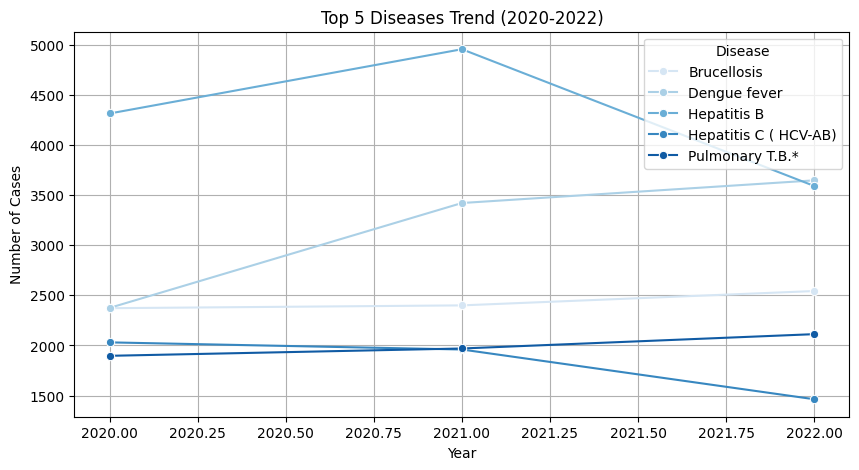

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_top, x="Year", y="Cases", hue="Disease", marker="o", palette="Blues")
plt.title("Top 5 Diseases Trend (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


# Step 6: Load and clean Sheet1
# This dataset contains incidence rates for diseases in 2022.

In [14]:
df_incidence = pd.read_excel(file_path, sheet_name="Sheet1")
df_incidence = df_incidence.rename(columns={
    "Incidence Rate per 100,000 population": "Incidence Rate"
})

# Step 7: Visualize the top 10 diseases by incidence rate


In [17]:
df_incidence = pd.read_excel(file_path, sheet_name="Sheet1")
# Check the actual column name in the DataFrame
print(df_incidence.columns)
# Rename the column correctly, making sure to match the actual name
# Ensure case sensitivity is correct
df_incidence = df_incidence.rename(columns={
    "Incidence Rate per 100,000 population": "Incidence Rate" # Replace with actual name if different
})

Index(['Disease', 'Years', 'Cases', 'Incidence Rate per 100,000 population'], dtype='object')


In [18]:
df_incidence = pd.read_excel(file_path, sheet_name="Sheet1")
# Rename the column correctly using the actual name
df_incidence = df_incidence.rename(columns={
    "Incidence Rate per 100,000 population": "Incidence Rate"
})

<ipython-input-25-7a7f136e5135>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_incidence_sorted_2022, x="Incidence Rate", y="Disease", palette="Blues")


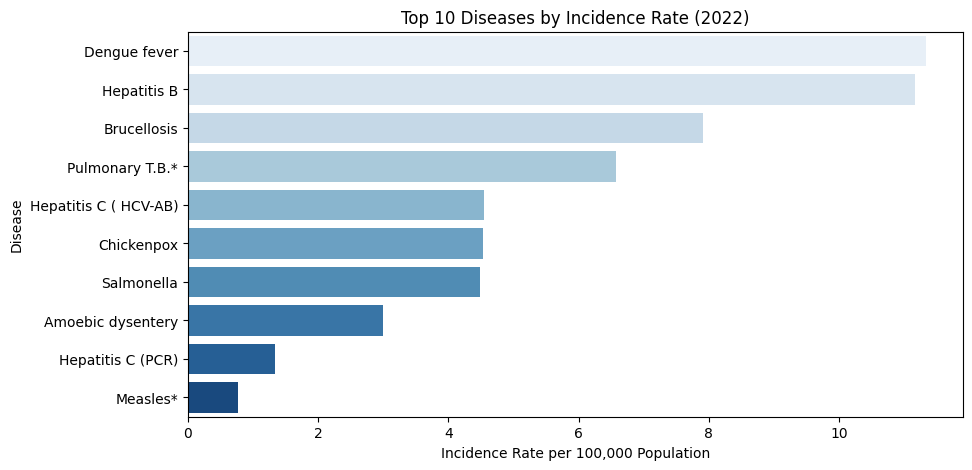

In [25]:
# Filter for 2022 data only
df_2022 = df_incidence[df_incidence['Years'] == 2022]

# Sort by incidence rate for 2022 data
df_incidence_sorted_2022 = df_2022.sort_values("Incidence Rate", ascending=False).head(10)

# Plot the data for 2022
plt.figure(figsize=(10, 5))
sns.barplot(data=df_incidence_sorted_2022, x="Incidence Rate", y="Disease", palette="Blues")
plt.title("Top 10 Diseases by Incidence Rate (2022)")
plt.xlabel("Incidence Rate per 100,000 Population")
plt.ylabel("Disease")
plt.show()



In [24]:
print(df_incidence_sorted)


         Disease  Years  Cases  Incidence Rate
48   Hepatitis B   2021   4955       16.095824
80   Hepatitis B   2020   4314       13.672446
26  Dengue fever   2022   3647       11.334808
16   Hepatitis B   2022   3591       11.160761
58  Dengue fever   2021   3421       11.112778
10   Brucellosis   2022   2543        7.903597
42   Brucellosis   2021   2400        7.796161
55    Salmonella   2021   2323        7.546034
90  Dengue fever   2020   2375        7.527135
74   Brucellosis   2020   2372        7.517627


# Step 8: Create a heatmap to show cases per year by disease


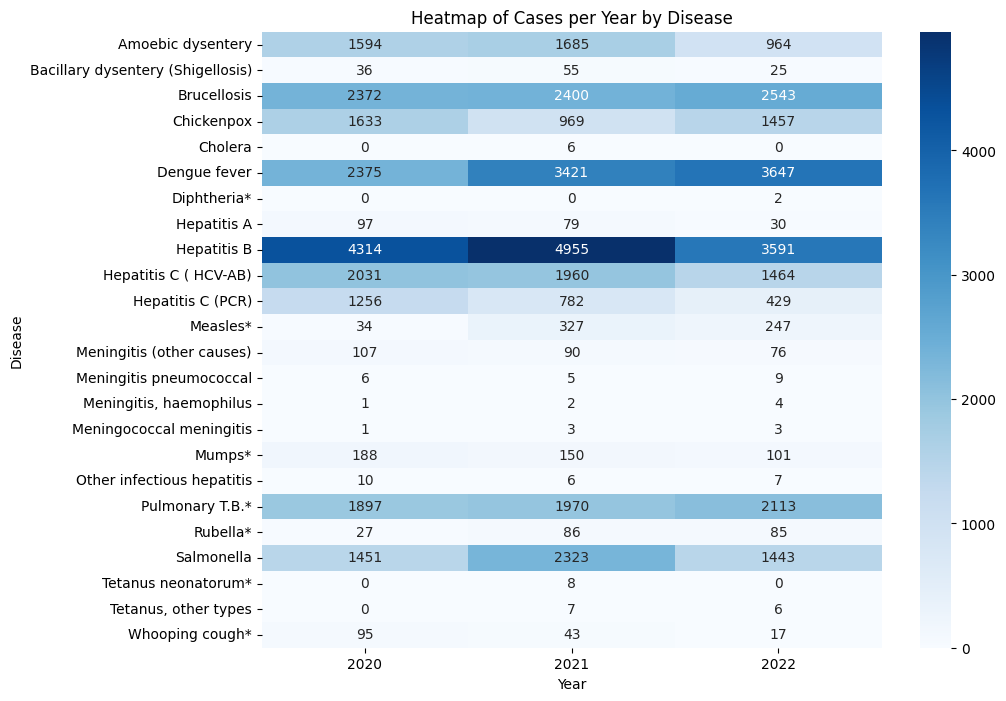

Analysis and visualizations completed successfully!


In [21]:
pivot_df = df.pivot(index="Disease", columns="Year", values="Cases").fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="Blues", annot=True, fmt=".0f")
plt.title("Heatmap of Cases per Year by Disease")
plt.xlabel("Year")
plt.ylabel("Disease")
plt.show()

print("Analysis and visualizations completed successfully!")